# Midterm Exam

Follow the instructions, write your Python code, and answer the questions. 

## Question 1
Write a program using the "f-strings" (https://realpython.com/python-f-strings/) and user input function to calculate Body mass index (BMI). 

Formula: $BMI=\frac {weight (kg)} {[height (m)]^2}$

Hint: you may need int() or float() function

An example output:
```
Weight (kg): 68
Height (cm): 165
BMI: 24.977043158861342
```

In [2]:
# Complete your code below (4 points) 
w = float(input('Weight (kg): '))
h = float(input('Height (cm): '))
bmi = w/(h/100)**2
print(f'BMI: {bmi}')

Weight (kg): 68
Height (cm): 165
BMI: 24.977043158861342


## Question 2

In John F. Kennedy's inaugural address, he spoke his famous words:

**"Ask not what your country can do for you - ask what you can do for your country."**

Write Python code to answer the following questions: 

In [13]:
# Save this quote in a data object named "quote" (1 point)
quote = "Ask not what your contry can do for you - ask what you can do for your contry."

In [14]:
# Count the total number of characters (including punctuaitons) in this quote. (1 point)
print(len(quote))

78


In [15]:
# Extract the second half of the quote (i.e., after " - ") (2 points)
print(quote[41:77])

 ask what you can do for your contry


In [16]:
# Create a list of all words (not including punctuaitons) in this quote (2 points)
# Transform all to lowercase. 
print(quote.lower().replace('.',' ').replace('-', ' ').split())

['ask', 'not', 'what', 'your', 'contry', 'can', 'do', 'for', 'you', 'ask', 'what', 'you', 'can', 'do', 'for', 'your', 'contry']


In [17]:
# Count the number of unique words in this quote. (2 points)
# Hint: "Ask" and "ask" are the same word.
words = quote.split()
unique_words = []
for word in words:
    if word not in unique_words:
        unique_words.append(word)
len(unique_words)

12

## Question 3. Marriott Hotel Category Change Analysis

**Case Description**

Marriott has over eight thousand hotels worldwide (https://www.marriott.com/hotel-search.mi). 

Marriott hotels are classified into eight categories with different rates for point redemption for customers in their loyalty program. 

Marriott adjusts category ratings for their hotels each year to reflect changing market conditions, such as average daily room rates, average occupancy, renovations, etc.

You are given the dataset on 2020 category changes: **marriott-2020.csv**

Below, you need to use Pandas to analyze the dataset and answer the questions below: 

### Step 1. Read the data

In [19]:
# 3.1 
# import pandas and numpy packages (1 point) 
import pandas as pd
import numpy as np

In [22]:
# 3.2
# read data from "marriott-2020.csv" and show the first five rows. (1 point)
marriott = pd.read_csv('../data/marriott-2020.csv', header=0)
marriott.head(5)

,Hotel,Brand,Destination,Current Category,Current Standard Price,New Category,New Standard Price
0,Aberdeen Marriott Hotel,Marriott,United Kingdom,3,17500,2,12500
1,AC Hotel Aitana,AC Hotels by Marriott,Spain,3,17500,4,25000
2,AC Hotel Alcala de Henares,AC Hotels by Marriott,Spain,1,7500,2,12500
3,AC Hotel Almeria,AC Hotels by Marriott,Spain,1,7500,2,12500
4,AC Hotel Aravaca,AC Hotels by Marriott,Spain,1,7500,2,12500


In [23]:
# 3.3
# Find the general information of this dataset: 
#   row count, column count, data type of each column
# Write you code here (1 point): 
marriott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Hotel                   2185 non-null   object
 1   Brand                   2185 non-null   object
 2   Destination             2185 non-null   object
 3   Current Category        2185 non-null   int64 
 4   Current Standard Price  2185 non-null   int64 
 5   New Category            2185 non-null   int64 
 6   New Standard Price      2185 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 119.6+ KB


In [ ]:
# 3.4
# Based on the output of your code above, answer the following questions (No code needed here) (1 point):
# Row count: 6
# Column count: 7
# Columns of string type: 3
# Columns of integer type: 4

### Step 2. Data Analysis

In [25]:
# 3.5
# How many unique brands are there in this dataset? (1 point)
marriott['Brand'].nunique()

30

In [32]:
# 3.6
# Which destination (country) has the most hotels listed in this dataset? (1 points)
# List the number of hotels in each country. 
marriott['Destination'].value_counts()
#USA has the most hotels listed in this dataset

USA          1548
Canada         76
China          68
Spain          34
India          26
             ... 
Monaco          1
Bhutan          1
Bolivia         1
Belarus         1
Sri Lanka       1
Name: Destination, Length: 98, dtype: int64

In [39]:
# 3.7
# How many hotels in Canada had their category changed (i.e., either upgraded or downgraded)? (2 points)
canada_changed = marriott[(marriott['Destination'] == 'Canada') & (marriott['Current Category'] != marriott['New Category'])]
len(canada_changed)

76

In [40]:
# 3.8
# How many brands in Canada had their category changed? (2 points)
canada_changed['Brand'].nunique()

15

In [42]:
# 3.9
# How many hotels worldwide were upgraded vs. downgraded in category in 2020? (2 points)
# Upgrade: "New Category" is greater than "Current Category".
len(marriott[(marriott['New Category'] > marriott['Current Category'])])

1686

In [44]:
# 3.10
# List all JW Marriott hotels in Cananda that had a category upgrade. (2 points)
(marriott[(marriott['Destination'] == 'Canada') & (marriott['Brand'] == 'JW Marriott') 
          & (marriott['New Category'] > marriott['Current Category'])])

,Hotel,Brand,Destination,Current Category,Current Standard Price,New Category,New Standard Price
1087,JW Marriott Parq Vancouver,JW Marriott,Canada,6,50000,7,60000


In [45]:
# 3.11
# List hotels whose category changes greater than 1 if any, (2 points)
# such as changing from category 3 to 5 (+2) or from category 7 to 4 (-3).
(marriott[(marriott['New Category'] - marriott['Current Category'] >= 2) \
          | (marriott['Current Category'] - marriott['New Category'] >= 2)])

,Hotel,Brand,Destination,Current Category,Current Standard Price,New Category,New Standard Price
913,"Four Points by Sheraton Bali, Ungasan",Four Points,Indonesia,4,25000,2,12500


In [48]:
# 3.12
# What's the standard price for each "New Category"?  (2 points)
# Sort the eight categories in ascending order of price. 
marriott[['New Category', 'New Standard Price']].sort_values('New Standard Price')

,New Category,New Standard Price
2184,1,7500
1289,1,7500
1426,1,7500
87,1,7500
1595,1,7500
...,...,...
1029,8,85000
1912,8,85000
1886,8,85000
2161,8,85000


In [50]:
# 3.13
# Which brands had the most hotels upgraded in category? (3 points)
# List the top 5 brands and the corresponding number of hotels upgraded.
upgrade = marriott[marriott['New Category'] > marriott['Current Category']]
upgrade['Brand'].value_counts().head(5)

Courtyard            322
Fairfield Inn        287
Residence Inn        251
SpringHill Suites    120
TownePlace Suites    103
Name: Brand, dtype: int64

In [54]:
# 3.14
# Group all hotels by destination and brand,
# Display the number of hotels, average current category, and average new category
# Only keep the destinations and brands with over 10 hotels. (3 points)
grouped = marriott.groupby(['Destination', 'Brand']).agg({'Hotel': 'count', 'Current Category': 'mean', 'New Category': 'mean'})
grouped[grouped['Hotel'] > 10]

Hotel  Current Category  New Category
Destination  Brand                                                       
Canada       Delta                     11          3.454545      3.545455
             Four Points               17          3.352941      2.588235
China        Marriott                  13          3.076923      3.153846
             Sheraton                  18          2.277778      2.500000
South Africa Protea Hotels             19          1.210526      2.105263
Spain        AC Hotels by Marriott     20          2.150000      3.050000
USA          AC Hotels by Marriott     18          3.833333      4.611111
             Aloft                     38          3.552632      3.973684
             Autograph Collection      34          5.323529      6.029412
             Courtyard                303          2.752475      3.580858
             Element                   18          3.777778      3.666667
             Fairfield Inn            327          2.480122      3.198777
             Four Points               42          3.357143      3.404762
             Marriott                  67          4.402985      4.716418
             Renaissance               21          4.571429      4.904762
             Residence Inn            266          2.909774      3.759398
             Ritz-Carlton              17          6.176471      7.176471
             Sheraton                  61          3.983607      4.065574
             SpringHill Suites        130          2.669231      3.515385
             TownePlace Suites        128          2.421875      2.984375
             Westin                    29          4.965517      5.482759

**3.15.** Assume you are in Feburary 2020 and the category (price) changes will take effect on March 1, 2020. You are planning your trip to **Florence**, **Italy** and **Hong Kong**, **China** in April. You only stay in hotels in **category 8** either at present or in the future. You want to optimize your points spending (i.e., to book the hotels by spending the least amount of points). 

Based on the data, which hotels would you book? When should you book your hotels for Florence and Hong Kong? Why? (4 points)

In [86]:
# Write your code here: 
vacation = marriott[(marriott['Destination'].isin(['Italy', 'China'])) & 
                      ((marriott['Current Category'] == 8) | (marriott['New Category'] == 8))]
                    
                    
vacation.sort_values(['New Standard Price'])



,Hotel,Brand,Destination,Current Category,Current Standard Price,New Category,New Standard Price
519,"Cristallo, a Luxury Collection Resort & Spa, C...",Luxury Collection,Italy,8,85000,7,60000
2165,W Hong Kong,W Hotels,China,8,85000,7,60000
145,"Cervo Hotel, Costa Smeralda Resort",Sheraton,Italy,7,60000,8,85000
1968,"The Westin Excelsior, Florence",Westin,Italy,7,60000,8,85000


In [ ]:
# More code if necessary: 


In [ ]:
# Answer the questions below: 

# For Florence, Italy, which hotel would you book? When should you book it? Why?
# The Westin Excelsior, Florence. Book it before March 1 because the current price is 60,000 and the new price is 85,000.
# For Hong Kong, China, which hotel would you book? When should you book it? Why?
# W Hong Kong. Book it after March 1 because the current price is 85,000 and the new price is 60,000


### Step 3. Data Visualization

In [61]:
# 3.16
# import necessary package(s) for visualization (1 point)
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-v0_8-bright') 
import seaborn as sns

<Axes: xlabel='New Category', ylabel='count'>

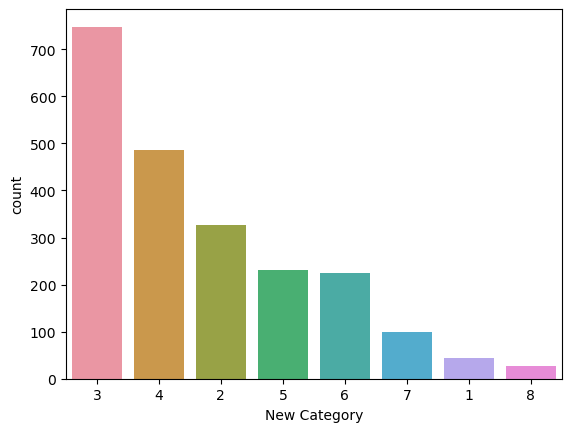

In [62]:
# 3.17
# Create a bar chart to compare the number of hotels in different new categories.(2 points)
order = marriott['New Category'].value_counts(ascending=False).index
sns.countplot(data=marriott, x='New Category', order=order)

<Axes: xlabel='Brand', ylabel='New Standard Price'>

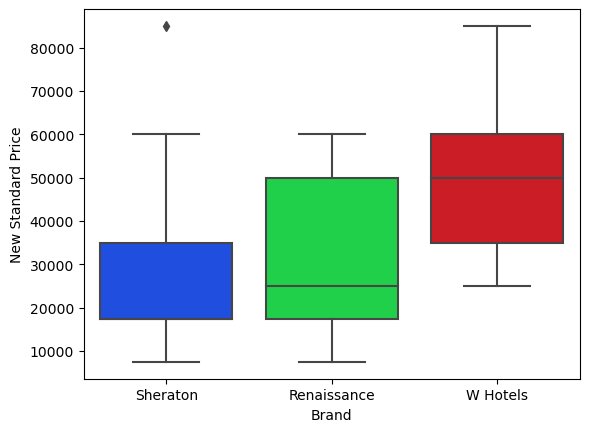

In [87]:
# 3.18
# Create a boxplot to compare the "New Standard Price" of the following three brands: 
# Sheraton, Renaissance, W Hotels (2 points)
subset = marriott[(marriott['Brand'].isin(['Sheraton', 'Renaissance', 'W Hotels']))]
sns.boxplot(data=subset, x= 'Brand' , y='New Standard Price')